# Load data 

In [68]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

from parse_logs import parser

# parser.root_data_path = '../data'
parser.root_data_path = '../test/data'

# load trials run to dict (it can take a while)
#trial_run_objects = parser.get_trial_runs(
#    exp_run_code='experiment_2021_07_09_10_03_24_run_dummy')

trial_run_objects = parser.get_trial_runs(
    exp_run_code='experiment_2021_04_01_16_20_00_run_1')

trial_run_dicts = [trial_run.to_dict() for trial_run in trial_run_objects]


FileNotFoundError: [Errno 2] No such file or directory: '../test/data/experiment_2021_04_01_16_20_00_run_1/step1_experiment_generation/design.json'

In [32]:
# sort and instantiate a dataframe
trial_run_dicts.sort(key=lambda tr: tr['trial_id'])
trial_run_dicts

trial_run_df = pd.DataFrame.from_records(trial_run_dicts)
trial_run_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_skills,factors_location
0,0,xxxxxp,les-02,planned,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
1,0,xxxxxp,les-05,planned,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
2,0,xxxxxp,les-04,planned,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
3,0,xxxxxp,les-03,planned,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
4,0,xxxxxp,les-06,planned,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,80,xxxxxp,les-03,planned,388.716667,NaN,reach-target,477.506723,False,x,x,x,x,x
963,80,xxxxxb,les-06,baseline,190.383333,NaN,reach-target,231.229957,False,x,x,x,x,x
964,80,xxxxxp,les-06,planned,388.716667,NaN,reach-target,477.506723,False,x,x,x,x,x
965,80,xxxxxb,les-01,baseline,190.383333,NaN,reach-target,231.229957,False,x,x,x,x,x


## Baseline

In [44]:
baseline_df = trial_run_df[trial_run_df.treatment == 'baseline']
baseline_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_skills,factors_location
6,0,xxxxxb,les-01,baseline,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
7,1,xxxxxb,les-02,baseline,NaN,NaN,timeout,900.808468,True,x,x,x,x,x
9,1,xxxxxb,les-05,baseline,NaN,NaN,timeout,900.808468,True,x,x,x,x,x
11,1,xxxxxb,les-04,baseline,NaN,NaN,timeout,900.808468,True,x,x,x,x,x
13,1,xxxxxb,les-03,baseline,NaN,NaN,timeout,900.808468,True,x,x,x,x,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,80,xxxxxb,les-05,baseline,190.383333,NaN,reach-target,231.229957,False,x,x,x,x,x
959,80,xxxxxb,les-04,baseline,190.383333,NaN,reach-target,231.229957,False,x,x,x,x,x
961,80,xxxxxb,les-03,baseline,190.383333,NaN,reach-target,231.229957,False,x,x,x,x,x
963,80,xxxxxb,les-06,baseline,190.383333,NaN,reach-target,231.229957,False,x,x,x,x,x


# Planned

In [39]:
planned_df = trial_run_df[trial_run_df.treatment == 'planned']
planned_df

,trial_id,code,machine,treatment,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_skills,factors_location
0,0,xxxxxp,les-02,planned,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
1,0,xxxxxp,les-05,planned,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
2,0,xxxxxp,les-04,planned,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
3,0,xxxxxp,les-03,planned,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
4,0,xxxxxp,les-06,planned,NaN,NaN,timeout,900.985122,True,x,x,x,x,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,80,xxxxxp,les-05,planned,388.716667,NaN,reach-target,477.506723,False,x,x,x,x,x
960,80,xxxxxp,les-04,planned,388.716667,NaN,reach-target,477.506723,False,x,x,x,x,x
962,80,xxxxxp,les-03,planned,388.716667,NaN,reach-target,477.506723,False,x,x,x,x,x
964,80,xxxxxp,les-06,planned,388.716667,NaN,reach-target,477.506723,False,x,x,x,x,x


In [45]:
# Average TCC

planned_ttc_avg = planned_df['ttc'].mean()
planned_ttc_avg

467.4556547574289

In [65]:
# by machine (no trial run dummy aparece o mesmo porque a pasta foi copiada)
(planned_df[planned_df.machine == 'les-01']['ttc'].mean(),
planned_df[planned_df.machine == 'les-02']['ttc'].mean(),
planned_df[planned_df.machine == 'les-03']['ttc'].mean())


(467.4556547574285, 467.4556547574285, 467.4556547574285)

In [67]:
# comparing factors (no dummy os fatores não foram distinguidos, porque teria que renomear os arquivos)
(planned_df[planned_df.factors_battery_charge == 'x']['ttc'].mean(),
 planned_df[planned_df.factors_battery_charge == 'x']['ttc'].mean())

(467.4556547574289, 467.4556547574289)

# Statistics

## Number of each event
i.e. how many times did the simulation achieve each status

In [52]:
# baseline_nums = [{col: None for col in baseline_df} for _ in range(num_experiments)]
# for col in baseline_df:
#     for i in range(num_experiments):
#         try:
#             baseline_nums[i][col] = len(baseline_df.loc[i][col])
#         except TypeError:
#             baseline_nums[i][col] = 0

by_end_state = trial_run_df.groupby(['end_state', 'treatment'])['end_state']
by_end_state.count()
# planned_by_end_state_df = planned_df.groupby('end_state')['end_state'].count()
# pd.merge(baseline_by_end_state_df, planned_by_end_state_df, on='end_state')

end_state     treatment
failure-bt    baseline     210
              planned       24
reach-target  baseline     210
              planned      336
timeout       baseline      61
              planned      126
Name: end_state, dtype: int64

end_state     treatment
failure-bt    baseline            NaN
              planned             NaN
reach-target  baseline     355.268571
              planned      467.455655
timeout       baseline            NaN
              planned             NaN
Name: ttc, dtype: float64

In [ ]:
planned_nums = [{col: None for col in planned_df} for _ in range(num_experiments)]
for col in planned_df:
    for i in range(num_experiments):
        try:
            planned_nums[i][col] = len(planned_df.loc[i][col])
        except TypeError:
            planned_nums[i][col] = 0

In [ ]:
planned_nums = pd.DataFrame(planned_nums)
planned_nums.columns = pd.CategoricalIndex(["reach-target", "failure-bt", "timeout"])
planned_nums

## Time to Conclusion

In [56]:
by_end_state_avg = trial_run_df.groupby(['end_state', 'treatment'])['ttc']
by_end_state_avg.mean()

end_state     treatment
failure-bt    baseline            NaN
              planned             NaN
reach-target  baseline     355.268571
              planned      467.455655
timeout       baseline            NaN
              planned             NaN
Name: ttc, dtype: float64

## STD

In [57]:
by_end_state_avg = trial_run_df.groupby(['end_state', 'treatment'])['ttc']
by_end_state_avg.std()

end_state     treatment
failure-bt    baseline            NaN
              planned             NaN
reach-target  baseline     111.241277
              planned      121.125113
timeout       baseline            NaN
              planned             NaN
Name: ttc, dtype: float64

# Plots

<AxesSubplot:xlabel='trial_id', ylabel='ttc'>

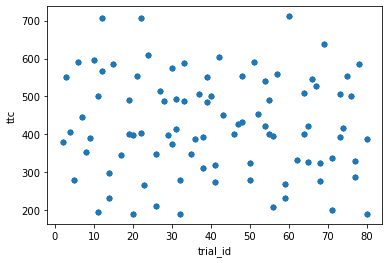

In [58]:
trial_run_df.plot.scatter(x='trial_id', y='ttc')

In [62]:
axes = planned_nums.plot.bar(subplots=True, figsize=(16, 8), color={"reach-target": "blue", "failure-bt": "orange", "timeout": "red"},)

NameError: name 'planned_nums' is not defined

## Successes per trial

In [63]:
suc = {"Planned Success": [x/8 for x in planned_nums["reach-target"]], 
       "Baseline Success": [x/8 for x in baseline_nums["reach-target"]]}
suc = pd.DataFrame(suc)
suc

NameError: name 'planned_nums' is not defined

In [ ]:
_, ax = plt.subplots()
suc["Planned Success"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="blue", zorder=0, legend=True)
suc["Baseline Success"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="orange", zorder=1, legend=True)

In [ ]:
suc.plot.bar(figsize=(16, 8))

In [ ]:
time = {"Planned Average Time": planned_avg["reach-target"], 
       "Baseline Average Time": baseline_avg["reach-target"]}
time = pd.DataFrame(time)
time

### Average time to reach target

In [ ]:
_, ax = plt.subplots()
time["Planned Average Time"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="blue", legend=True)
time["Baseline Average Time"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="orange", legend=True)

In [ ]:
time.plot.bar(figsize=(16, 8))

# Metrics
## Metric1 - Success

In [ ]:
metric1 = {"Metric 1": planned_nums["reach-target"]/baseline_nums["reach-target"]}
metric1 = pd.DataFrame(metric1)
metric1

In [ ]:
[x for x in metric1["Metric 1"]]

In [ ]:
metric1.plot.bar(figsize=(16, 8))

## Metric2 - TTC

In [ ]:
metric2 = {"Metric 2": planned_avg["reach-target"]/baseline_avg["reach-target"]}
metric2 = pd.DataFrame(metric2)
metric2

In [ ]:
metric2.plot.bar(figsize=(16, 8))